In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Files to load
variety_by_sales_data_to_load = "data/top_wine_variety_by_sales_volume.csv"
winemag_data_to_load = "data/winemag_data_v2.csv"

# Read data
variety_by_sales_data = pd.read_csv(variety_by_sales_data_to_load)
winemag_data = pd.read_csv(winemag_data_to_load)

winemag_data_variety_score = winemag_data.drop(columns=["Unnamed: 0","description","region_2","taster_name",
                                                           "taster_twitter_handle","title"])

winemag_data_variety_score.head()

,country,designation,points,price,province,region_1,variety,winery
0,Italy,Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,White Blend,Nicosia
1,Portugal,Avidagos,87,15.0,Douro,NaN,Portuguese Red,Quinta dos Avidagos
2,US,NaN,87,14.0,Oregon,Willamette Valley,Pinot Gris,Rainstorm
3,US,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Riesling,St. Julian
4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Pinot Noir,Sweet Cheeks


In [4]:
# California region mean wine scores
winemag_data_variety_score_ca = winemag_data_variety_score.loc[winemag_data_variety_score["province"] == "California"]
winemag_data_variety_score_ca_region = winemag_data_variety_score_ca.groupby("region_1")
winemag_data_variety_score_ca_region_average = winemag_data_variety_score_ca_region["points"].mean()

# summary dataframe
summary_table_3 = pd.DataFrame({"Mean Wine Score": winemag_data_variety_score_ca_region_average})
summary_table_3 = summary_table_3.sort_values("Mean Wine Score",ascending=False)

summary_table_3.index.name = "California Region"
summary_table_3_top5 = summary_table_3.head()
summary_table_3_top5

,Mean Wine Score
California Region,
Napa-Monterey-Mendocino,96.000000
McDowell Valley,94.000000
Fort Ross-Seaview,92.546875
Monterey-Santa Cruz,92.000000
Ballard Canyon,91.746835


<IPython.core.display.Javascript object>


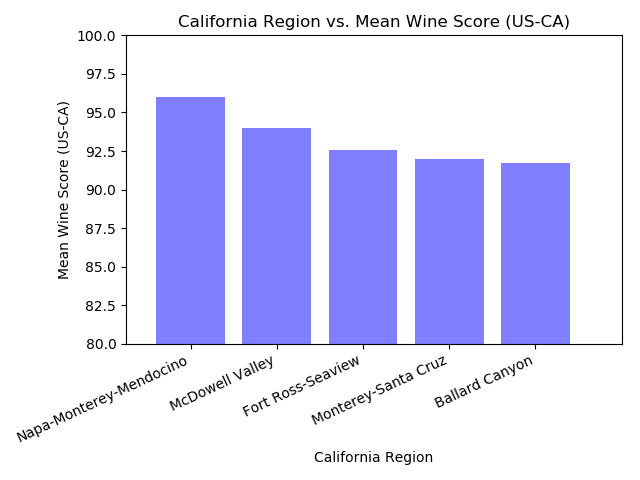

In [5]:
# Set x- and y-axis and tick locations
x_axis = np.arange(0,len(summary_table_3_top5),1)
y_axis = summary_table_3_top5["Mean Wine Score"]
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels
ha = "right"
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, summary_table_3.index, rotation=25, ha=ha)

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(80, 100)

# Set a title and labels
plt.title("California Region vs. Mean Wine Score (US-CA)")
plt.xlabel("California Region")
plt.ylabel("Mean Wine Score (US-CA)")

# Save our graph and show the graph
plt.tight_layout()
plt.savefig("Output/Output3.png")
plt.show()